In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud as cloud

In [349]:
# Load files
path = "C:/Users/Wil/OneDrive/Desktop/Hispanish Latin American Literature Presenation/"
spanish_tbl = pd.read_csv(path + "English_Translations_Spanish_Novels_HLAS_Data.csv")
portuguese_tbl = pd.read_csv(path + "English_Translations_Portuguese_Novels_HLAS_Data.csv")
portuguese_tbl

,Link to HLAS catalog,author,Author city of origin,English title,translator name,city where book was published,publisher,year published,translation annotations
0,https://lccn.loc.gov/bi78107936,"Amado, Jorge",Bahía,Dona Flor and her two husbands: a moral and am...,Harriet de Onís,New York,Knopf,1969,Appreciated for its exhuberance and sensuality...
1,https://lccn.loc.gov/bi78107939,"Castro, Josué de",Pernambuco,Of men and crabs,Susan Hertelendy,New York,Vanguard Press,1970,"Fictionalized bibliography, reminiscence, fict..."
2,https://lccn.loc.gov/bi78107941,Machado de Assis,Río de Janeiro,The hand & the glove,"Albert I. Bagby, Jr.",Lexington,University Press of Kentucky,1970,This small novel is from the first of the auth...
3,https://lccn.loc.gov/bi78107942,"Pereira, Antonio Olavo",São Paulo,Marcoré,Alfred Hower and John Saunders,Austin,University of Texas Press,1970,"Critical and popular success, a simple, straig..."
4,https://lccn.loc.gov/bi78107938,"Callado, Antônio",Río de Janeiro,Don Juan's bar:a novel,Barbara Shelby,New York,Alfred A. Knopf,1972,In the same political vein as his more widely-...
...,...,...,...,...,...,...,...,...,...
186,https://lccn.loc.gov/bi2018001297,"Buarque, Chico",Río de Janeiro,My German brother,Alison Entrekin,New York,Farrar Straus and Giroux,2018,{My German Brother} is the fifth novel by Chic...
187,https://lccn.loc.gov/bi2018001800,"Lispector, Clarice",Chechelnik,The chandelier,Benjamin Moser and Magdalena Edwards,New York,New Directions,2018,"Originally titled {O lustre} (The Lamp), this ..."
188,https://lccn.loc.gov/bi2018003720,"Lispector, Clarice",Chechelnik,The besieged city,Johnny Lorenz,New York,New Directions,2019,"In 1971, Clarice Lispector revealed to Rio de ..."
189,https://lccn.loc.gov/bi86106547,"de Andrade, Mário",São Paulo,Macunaíma,E A Goodland,New York,Random House,1984,"Macunaíma (its subtitle, the hero without cha..."


In [350]:
spanish_clean = spanish_tbl.drop(columns=["Link to HLAS Catalog", "Translator", "City where book was published", 
"Name of Publisher"]).rename(columns={
    'Author': 'author',
    'Country of Origin': 'country',
    'English Title': 'title',
    'Year book was published': 'year',
    'Annotations about translation': 'notes'
}).query('country != "Spain"')
spanish_clean.sample(3)

,author,country,title,year,notes
394,"Aira, César",Argentina,Ghosts,2008,"César Aíra's fiction invariably captivates, ..."
68,"Ibargüengoitia, Jorge",Mexico,The lightning of August,1986,"Once Lupe's voice takes hold, del Corral's ver..."
326,"Arlt, Roberto",Argentina,Mad toy,2002,Four episodes in the life of the artist as a y...


In [351]:
portuguese_clean = portuguese_tbl.drop(columns=["Link to HLAS catalog", "translator name",
 "city where book was published", 'Author city of origin', 'publisher']).rename(columns={
    'English title': 'title',
   'year published': 'year',
   'translation annotations': 'notes'
})

portuguese_clean['country'] = portuguese_clean.apply(lambda x: "Brazil", axis=1)
portuguese_clean.sample(3)
type(portuguese_clean)

pandas.core.frame.DataFrame

In [352]:
latin_clean = pd.concat([spanish_clean, portuguese_clean])
latin_clean.sample(10)

,author,country,title,year,notes
40,"Azuela, Mariano",Mexico,Three novels,1979,This translation of three major novels ({Liter...
34,"Amado, Jorge",Brazil,Show down,1988,"Although very readable, this translation of Am..."
287,"Argueta, Manlio",El Salvador,A place called Milagro de la Paz,2000,Argueta's fifth novel {lcub}Milagro de la Paz{...
167,"Betto, Frei",Brazil,Hotel Brasil:the mystery of the severed heads,2014,"Frei Betto, a well-known prolific writer and j..."
18,"Souza, Márcio",Brazil,Mad Maria,1985,Wicked Yankee capitalists and corrupt Brazilia...
546,"Hasbún, Rodrigo",Bolivia,Affections,2017,A work of fiction inspired on historical figur...
64,"Skármeta, Antonio",Chile,I dreamt the snow was burning,1985,"There are big novels on small themes, and smal..."
109,"Proença, Edyr Augusto",Brazil,Hornets' nest,2007,"This third novel by Edyr Augusto, a poet, play..."
441,"Gamerro, Carlos",Argentina,An open secret,2011,{An Open Secret} (tr. of {El secreto y las voc...
371,"Cozarinsky, Edgardo",Argentina,The Moldavian pimp,2006,Wonderful translation of {El rufián moldavo} ...


In [353]:
mexican_clean = spanish_clean.query("country == 'Mexico'")

In [354]:
len(latin_clean), len(spanish_clean), len(mexican_clean)

(757, 566, 116)

In [355]:
mexican_lit = mexican_clean.sort_values('title')['title'].to_list()

for book in mexican_lit:
    print(book, end=", ")

1492:the life and times of Juan Cabezón of Castile, A Tuesday like today , A change of skin , A murmur of bees , Adam in Eden , After the winter , Almost never , Among the lost , Aura , Bubbeh , Cartucho; and, My mother's hands , Christopher unborn , Cleopatra dismounts:a novel , Dear Diego , Desire and its shadow , Destiny and desire:a novel , Diana, the goddess who hunts alone , Distant relations , Down the rabbit hole , El Zarco, the blue-eyed bandit:episodes of Mexican life between 1861-1863, Empty set , Faces in the crowd:a novel , Farabeuf , Flowers and Mishima's illustrated biography : Flores y biografía ilustrada de Mishima , Gazapo , Gray skies tomorrow , Here's to you, Jesusa! , Human mourning , Hurricane season , In spite of the dark silence , Jacob the mutant , Jakarta , Kill the lion!, Leaving Tabasco , Like a brideand Like a mother , Like water for chocolate:a novel in monthly installments, with recipes, romances, and home remedies , Lost in the city:two novels , Lovesi

In [356]:
latin_series = latin_clean.pivot(columns='country').count()
latin_series = latin_series.get('author')
latin_series.sort_values(ascending=False)
countries, frequencies = list(latin_series.keys()), list(latin_series.values)
countries, frequencies

(['Argentina',
  'Bolivia',
  'Brazil',
  'Chicago',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Cuba',
  'Dominican Republic',
  'Ecuador',
  'El Salvador',
  'Guatemala',
  'Honduras',
  'Mexico',
  'Nicaragua',
  'Paraguay',
  'Peru',
  'Puerto Rico',
  'United States',
  'Uruguay',
  'Venezuela'],
 [161, 11, 191, 1, 61, 36, 2, 62, 4, 5, 9, 13, 2, 116, 5, 1, 37, 13, 2, 17, 8])

In [357]:
pie_data = pd.DataFrame({
    "country": countries,
    "count": frequencies
})
pie_data

,country,count
0,Argentina,161
1,Bolivia,11
2,Brazil,191
3,Chicago,1
4,Chile,61
5,Colombia,36
6,Costa Rica,2
7,Cuba,62
8,Dominican Republic,4
9,Ecuador,5


In [358]:
other_threshold = 20

other_countries = pie_data.query(f'count <= {other_threshold}')
other_countries_data = {
    "country": "(Other)",
    "count": sum(other_countries['count'].to_list()),
}
other_countries_data

{'country': '(Other)', 'count': 93}

In [359]:
no_other_countries = pie_data.query(f'count > {other_threshold}')
pie_data_with_other = no_other_countries.append(other_countries_data, ignore_index=True)
pie_data_with_other["count"] = pd.to_numeric(pie_data_with_other["count"])
pie_data_with_other


C:\Users\Wil\AppData\Local\Temp\ipykernel_31344\2978685199.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data_with_other = no_other_countries.append(other_countries_data, ignore_index=True)


,country,count
0,Argentina,161
1,Brazil,191
2,Chile,61
3,Colombia,36
4,Cuba,62
5,Mexico,116
6,Peru,37
7,(Other),93


([<matplotlib.patches.Wedge at 0x1ac3050b250>,
 [Text(0.8634598844559873, 0.6814961686871418, 'Argentina'),
  Text(-0.5826100682907646, 0.9330410003457676, 'Brazil'),
  Text(-1.0993938056890404, -0.03651383316728714, 'Chile'),
  Text(-0.9972063371324389, -0.46430541799865405, 'Colombia'),
  Text(-0.7321906765488873, -0.8209121835951046, 'Cuba'),
  Text(0.011412492000559866, -1.0999407961460186, 'Mexico'),
  Text(0.6616116681798612, -0.8787889396938616, 'Peru'),
  Text(1.0190832062305546, -0.4140886605291833, '(Other)')],
 [Text(0.47097811879417484, 0.37172518292025913, '21.3%'),
  Text(-0.3177873099767807, 0.508931454734055, '25.2%'),
  Text(-0.5996693485576584, -0.019916636273065707, '8.1%'),
  Text(-0.5439307293449666, -0.2532575007265386, '4.8%'),
  Text(-0.39937673266302937, -0.44777028196096613, '8.2%'),
  Text(0.0062249956366690175, -0.5999677069887374, '15.3%'),
  Text(0.3608790917344697, -0.47933942165119714, '4.9%'),
  Text(0.5558635670348478, -0.22586654210682722, '12.3%')])

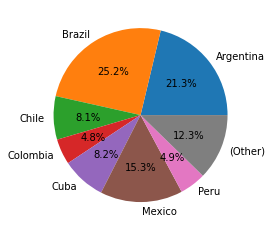

In [360]:
fig, ax = plt.subplots()
ax.pie(pie_data_with_other["count"], labels=pie_data_with_other["country"], autopct='%1.1f%%')

In [361]:
forbidden_words = ['English', 'novel', 'translation', 'work', 'translator', 'translate', 'published',
'narrative', 'language', 'original', 'introduction', 'rcub', 'translated', 'literacy', 'author', 'literary',
'lcub', 'protagonist', 'includes', 'publication', 'however', 'DP', 'HLAS', 'MA', 'literature', 'character', 'n']

def all_words(str_list, with_space=False):
    output = ""
    for s in str_list:
        output += s
        if with_space:
            output += ' '

    return output

words = all_words(mexican_clean.dropna()['notes'])
words = all_words(list(filter(lambda word: len(word) > 7, words.split(' '))), with_space=True)


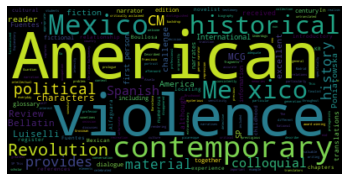

In [362]:
wordcloud = cloud.WordCloud(stopwords=forbidden_words).generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()